In [1]:
from qiskit_ionq import IonQProvider, ionq_job
ionq_provider = IonQProvider("mycsEhnoIgARQdch53Zm7KJUePwFD0Wr")
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram, array_to_latex
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.quantum_info import Statevector, DensityMatrix, Operator
from matplotlib import pyplot as plt
import numpy as np
import time
from qiskit.circuit import Parameter


In [2]:
sim_backend = ionq_provider.get_backend('ionq_simulator')

qpu_backend = ionq_provider.get_backend('ionq_qpu')

In [685]:
edge=5

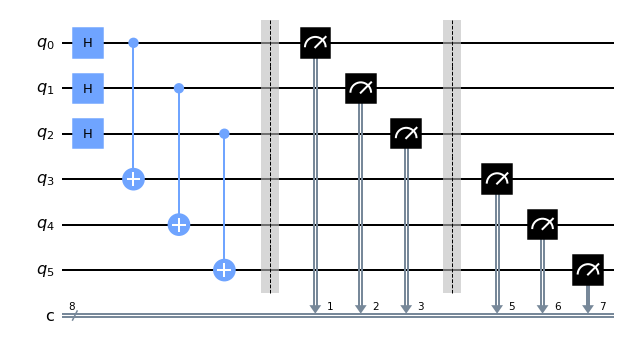

In [686]:
qr = QuantumRegister(6,'q')
cr = ClassicalRegister(8,'c')
qc = QuantumCircuit(qr,cr)

qc.h(0)
qc.h(1)
qc.h(2)
qc.cx(0,3)
qc.cx(1,4)
qc.cx(2,5)
qc.barrier()

if edge==1:
    qc.h(1)
    qc.cx(0,1)
    qc.h(1)
    qc.cx(0,2)
    qc.cx(1,2)
    qc.h(0)
    qc.h(1)
    qc.measure(2,0)
    qc.measure(1,1)
    qc.measure(0,2)
    qc.barrier()
    qc.h(4)
    qc.cx(3,4)
    qc.h(4)
    qc.cx(3,5)
    qc.cx(4,5)
    qc.h(3)
    qc.h(4)
    qc.measure(5,4)
    qc.measure(4,5)
    qc.measure(3,6)    


if edge==2:
    qc.h(0)
    qc.h(1)
    qc.measure(1,0)
    qc.measure(2,1)
    qc.measure(0,2)
    qc.barrier()
    qc.h(3)
    qc.h(4)
    qc.measure(4,4)
    qc.measure(5,5)
    qc.measure(3,6)


if edge==3:
    qc.h(1)
    qc.h(2)
    qc.measure(1,0)
    qc.measure(0,1)
    qc.measure(2,3)
    qc.barrier()
    qc.h(4)
    qc.h(5)    
    qc.measure(4,4)
    qc.measure(3,5)
    qc.measure(5,7)

if edge==4:
    qc.h(0)
    qc.h(2)
    qc.measure(2,0)
    qc.measure(0,2) 
    qc.measure(1,3)
    qc.barrier()
    qc.h(3)
    qc.h(5)    
    qc.measure(5,4)
    qc.measure(3,6)
    qc.measure(4,7)   

if edge==5:
    qc.measure(0,1)
    qc.measure(1,2) 
    qc.measure(2,3)
    qc.barrier()
  
    qc.measure(3,5)
    qc.measure(4,6)
    qc.measure(5,7)  



qc.draw(output='mpl')

In [553]:
f = open("C:/Users/cbk92/Desktop/해커톤/ID_2.3_5.txt",'r')
ID_after=f.readlines()



f.close()

In [554]:
for i in range(10):
    ID_after[i] = ID_after[i].strip('\n')

In [609]:
arr_keys=[]
job_ret = qpu_backend.retrieve_job(ID_after[9])
probs = job_ret.get_probabilities()
all_keys=list(probs.keys())
arr_keys.append(all_keys)

In [610]:
Alice=[]
Bob=[]
for i in range(len(all_keys)):
    if edge==1:
        Alice1=all_keys[i][-1]
        Alice2=all_keys[i][-2]
        Alice3=all_keys[i][-3]
        Alice_tot=Alice1+Alice2+Alice3
        if (int(Alice1)+int(Alice2)+int(Alice3)==1 or int(Alice1)+int(Alice2)+int(Alice3)== 3):
            Alice4=str(0)
        else:
            Alice4=str(1)
        Alice_tot+=Alice4
        Alice.append(Alice_tot)

        Bob1=all_keys[i][-5]
        Bob2=all_keys[i][-6]
        Bob3=all_keys[i][-7]
        Bob_tot=Bob1+Bob2+Bob3
        if (int(Bob1)+int(Bob2)+int(Bob3)==0 or int(Bob1)+int(Bob2)+int(Bob3)==2):
            Bob4=str(1)
        else:
            Bob4=str(0)
        Bob_tot+=Bob4
        Bob.append(Bob_tot)

    elif edge==2:
        Alice1=all_keys[i][-1]
        Alice2=all_keys[i][-2]
        Alice3=all_keys[i][-3]
        Alice_tot=Alice1+Alice2+Alice3
        if (int(Alice1)+int(Alice2)+int(Alice3)==1 or int(Alice1)+int(Alice2)+int(Alice3)== 3):
            Alice4=str(1)
        else:
            Alice4=str(0)
        Alice_tot+=Alice4
        Alice.append(Alice_tot)

        Bob1=all_keys[i][-5]
        Bob2=all_keys[i][-6]
        Bob3=all_keys[i][-7]
        Bob_tot=Bob1+Bob2+Bob3
        if (int(Bob1)+int(Bob2)+int(Bob3)==0 or int(Bob1)+int(Bob2)+int(Bob3)==2):
            Bob4=str(0)
        else:
            Bob4=str(1)
        Bob_tot+=Bob4
        Bob.append(Bob_tot)

    elif edge==3:
        Alice1=all_keys[i][-1]
        Alice2=all_keys[i][-2]
        Alice4=all_keys[i][-4]
        if (int(Alice1)+int(Alice2)+int(Alice4)==1 or int(Alice1)+int(Alice2)+int(Alice4)== 3):
            Alice3=str(1)
        else:
            Alice3=str(0)
        Alice_tot=Alice1+Alice2+Alice3+Alice4
        Alice.append(Alice_tot)

        Bob1=all_keys[i][-5]
        Bob2=all_keys[i][-6]
        Bob4=all_keys[i][-8]
        if (int(Bob1)+int(Bob2)+int(Bob4)==0 or int(Bob1)+int(Bob2)+int(Bob4)==2):
            Bob3=str(0)
        else:
            Bob3=str(1)
        Bob_tot=Bob1+Bob2+Bob3+Bob4
        Bob.append(Bob_tot)

    elif edge==4:
        Alice1=all_keys[i][-1]
        Alice3=all_keys[i][-3]
        Alice4=all_keys[i][-4]
        if (int(Alice1)+int(Alice3)+int(Alice4)==1 or int(Alice1)+int(Alice3)+int(Alice4)== 3):
            Alice2=str(1)
        else:
            Alice2=str(0)
        Alice_tot=Alice1+Alice2+Alice3+Alice4
        Alice.append(Alice_tot)

        Bob1=all_keys[i][-5]
        Bob3=all_keys[i][-7]
        Bob4=all_keys[i][-8]
        if (int(Bob1)+int(Bob3)+int(Bob4)==0 or int(Bob1)+int(Bob3)+int(Bob4)==2):
            Bob2=str(0)
        else:
            Bob2=str(1)
        Bob_tot=Bob1+Bob2+Bob3+Bob4
        Bob.append(Bob_tot)
        
    elif edge==5:
        Alice2=all_keys[i][-2]
        Alice3=all_keys[i][-3]
        Alice4=all_keys[i][-4]
        if (int(Alice2)+int(Alice3)+int(Alice4)==1 or int(Alice2)+int(Alice3)+int(Alice4)== 3):
            Alice1=str(1)
        else:
            Alice1=str(0)
        Alice_tot=Alice1+Alice2+Alice3+Alice4
        Alice.append(Alice_tot)

        Bob2=all_keys[i][-6]
        Bob3=all_keys[i][-7]
        Bob4=all_keys[i][-8]
        if (int(Bob2)+int(Bob3)+int(Bob4)==0 or int(Bob2)+int(Bob3)+int(Bob4)==2):
            Bob1=str(0)
        else:
            Bob1=str(1)
        Bob_tot=Bob1+Bob2+Bob3+Bob4
        Bob.append(Bob_tot)

In [611]:
flist=[]
probl=[]
for i in range(len(all_keys)):
    n=0
    if Bob[i]!=Alice[i]:
        flist.append(all_keys[i])
        for j in range(4):
            if Bob[i][j]!=Alice[i][j]:
                n+=1
        probl.append(n/4)

In [612]:
err_prob = 0
for i in range(len(flist)):
    err_prob += probs.get(flist[i])*probl[i]

In [120]:
#ID = []

In [121]:
#for i in range(10):
#    job = qpu_backend.run(qc,shots = 1024)
#    ID.append(job.job_id())

In [122]:
#f = open("C:/Users/cbk92/Desktop/해커톤/ID_2.3_5.txt",'w')

#for i in range(10):
#    f.write(ID[i])
#    f.write('\n')

#f.close()

In [674]:
job = sim_backend.run(qc,shots = 1024)

In [675]:
k=job.get_probabilities()

In [676]:
b=list(k.keys())

In [677]:
Alice=[]
Bob=[]
for i in range(8):
    if edge==1:
        Alice1=b[i][-1]
        Alice2=b[i][-2]
        Alice3=b[i][-3]
        Alice_tot=Alice1+Alice2+Alice3
        if (int(Alice1)+int(Alice2)+int(Alice3)==1 or int(Alice1)+int(Alice2)+int(Alice3)== 3):
            Alice4=str(0)
        else:
            Alice4=str(1)
        Alice_tot+=Alice4
        Alice.append(Alice_tot)

        Bob1=b[i][-5]
        Bob2=b[i][-6]
        Bob3=b[i][-7]
        Bob_tot=Bob1+Bob2+Bob3
        if (int(Bob1)+int(Bob2)+int(Bob3)==0 or int(Bob1)+int(Bob2)+int(Bob3)==2):
            Bob4=str(1)
        else:
            Bob4=str(0)
        Bob_tot+=Bob4
        Bob.append(Bob_tot)

    elif edge==2:
        Alice1=b[i][-1]
        Alice2=b[i][-2]
        Alice3=b[i][-3]
        Alice_tot=Alice1+Alice2+Alice3
        if (int(Alice1)+int(Alice2)+int(Alice3)==1 or int(Alice1)+int(Alice2)+int(Alice3)== 3):
            Alice4=str(1)
        else:
            Alice4=str(0)
        Alice_tot+=Alice4
        Alice.append(Alice_tot)

        Bob1=b[i][-5]
        Bob2=b[i][-6]
        Bob3=b[i][-7]
        Bob_tot=Bob1+Bob2+Bob3
        if (int(Bob1)+int(Bob2)+int(Bob3)==0 or int(Bob1)+int(Bob2)+int(Bob3)==2):
            Bob4=str(0)
        else:
            Bob4=str(1)
        Bob_tot+=Bob4
        Bob.append(Bob_tot)

    elif edge==3:
        Alice1=b[i][-1]
        Alice2=b[i][-2]
        Alice4=b[i][-4]
        if (int(Alice1)+int(Alice2)+int(Alice4)==1 or int(Alice1)+int(Alice2)+int(Alice4)== 3):
            Alice3=str(1)
        else:
            Alice3=str(0)
        Alice_tot=Alice1+Alice2+Alice3+Alice4
        Alice.append(Alice_tot)

        Bob1=b[i][-5]
        Bob2=b[i][-6]
        Bob4=b[i][-8]
        if (int(Bob1)+int(Bob2)+int(Bob4)==0 or int(Bob1)+int(Bob2)+int(Bob4)==2):
            Bob3=str(0)
        else:
            Bob3=str(1)
        Bob_tot=Bob1+Bob2+Bob3+Bob4
        Bob.append(Bob_tot)

    elif edge==4:
        Alice1=b[i][-1]
        Alice3=b[i][-3]
        Alice4=b[i][-4]
        if (int(Alice1)+int(Alice3)+int(Alice4)==1 or int(Alice1)+int(Alice3)+int(Alice4)== 3):
            Alice2=str(1)
        else:
            Alice2=str(0)
        Alice_tot=Alice1+Alice2+Alice3+Alice4
        Alice.append(Alice_tot)

        Bob1=b[i][-5]
        Bob3=b[i][-7]
        Bob4=b[i][-8]
        if (int(Bob1)+int(Bob3)+int(Bob4)==0 or int(Bob1)+int(Bob3)+int(Bob4)==2):
            Bob2=str(0)
        else:
            Bob2=str(1)
        Bob_tot=Bob1+Bob2+Bob3+Bob4
        Bob.append(Bob_tot)
        
    elif edge==5:
        Alice2=b[i][-2]
        Alice3=b[i][-3]
        Alice4=b[i][-4]
        if (int(Alice2)+int(Alice3)+int(Alice4)==1 or int(Alice2)+int(Alice3)+int(Alice4)== 3):
            Alice1=str(1)
        else:
            Alice1=str(0)
        Alice_tot=Alice1+Alice2+Alice3+Alice4
        Alice.append(Alice_tot)

        Bob2=b[i][-6]
        Bob3=b[i][-7]
        Bob4=b[i][-8]
        if (int(Bob2)+int(Bob3)+int(Bob4)==0 or int(Bob2)+int(Bob3)+int(Bob4)==2):
            Bob1=str(0)
        else:
            Bob1=str(1)
        Bob_tot=Bob1+Bob2+Bob3+Bob4
        Bob.append(Bob_tot)

In [678]:
z=0
for i in range(8):
    if Alice[i]!=Bob[i]:
        z+=1
    else:
        z+=0
if z==0:
    print('True')
else:
    print('False')

True


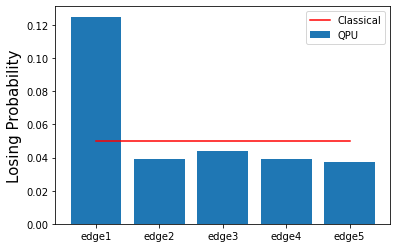

In [703]:
y1=[0.125,0.0391,0.0439,0.0394,0.0371]
y2=[0.05,0.05,0.05,0.05,0.05]
x=[1,2,3,4,5]

plt.xticks(x,labels=['edge1','edge2','edge3','edge4','edge5'])
plt.ylabel('Losing Probability',size=15)

plt.bar(x,y1)
plt.plot(x,y2,color='red')

plt.legend(['Classical','QPU'])
plt.show()

